## Constructing a supercell from a given unit cell of a crystalline system 

Defining the lattice parameters and the atomic positions 

In [1]:
# BASIC CELL STRUCTURE 
struct Cell
    """ 
    Geometry and atomic orbitals inside the unit cell of the crystalline system 
    """
    system_name::String
    vielbein::Matrix{Float64}
    space_dimension::Int8
    orbitals_loci::Union{Vector{Vector{Float64}}, Matrix{Float64}}
end 

In [2]:
# CONSTRUCTOR FOR THE BASIC CELL STRUCTURE 
function create_cell(
        system_name::String, 
        generators::Matrix{Float64}, 
        orbital_positions::Union{Vector{Vector{Float64}}, Matrix{Float64}}
        )
    """ 
    Constructor for the Cell immutable Composite type 
    """
    # Compute the dimensionality from the given data 
    space_dimension = size(generators, 1)
    cell = Cell(
        system_name, 
        generators,
        space_dimension, 
        orbital_positions
        )
    return cell 
    
end 

create_cell (generic function with 1 method)

In [160]:
# Example : Graphene 
e1 = [2.4410462393  0.0000000000000000 0.0000000000000000]
e2 = [-1.2205231197  2.1140080551 0.0000000000000000]
e3 = [0.000000   0.000000   20.000000]

e = [e1; e2; e3]
name = "Graphene" 
positions = [0.0 0.0 0.0; 0.0000 1.4093387034 0.0]
cell = create_cell(name, e, positions);

In [161]:
#########################################################
###################### 2D VISUALIZATION #################
#########################################################
using Plots
function drawcell(uc::Cell)
    """
    Draws the unit cell of the lattice. Doesn't take orbitals into account
    """
    gr()
    basis = uc.vielbein
    e1, e2 = basis[1,:], basis[2,:]
    e12 = e1 + e2 
    x, y = basis[:,1], basis[:,2]
    x = [x; 0.0; e12[1]]
    y = [y; 0.0; e12[2]]
    
    scatter(x, y, 
        markersize = 10, 
        markercolor = :purple4, 
        xaxis = false, yaxis = false, legend = false, grid = false, ticks = false)
    
    
    quiver!([0.0], [0.0], quiver = ([e1[1]], [e1[2]]), c = :grey0, linewidth = 5)
    quiver!([0.0], [0.0], quiver = ([e2[1]], [e2[2]]), c = :grey0, linewidth = 5)
    quiver!([e1[1]], [e1[2]], quiver = ([e2[1]], [e2[2]]), c = :grey0, linewidth = 5)
    quiver!([e2[1]], [e2[2]], quiver = ([e1[1]], [e1[2]]), c = :grey0, linewidth = 5)

end

function drawlattice(boundx::Int, boundy::Int, uc::Cell) 
    """
    Draws the lattice without taking into account the atomic orbitals 
    """
    gr() 
    basis = uc.vielbein 
    e1, e2 = reshape(basis[1, 1:2], 1, 2), reshape(basis[2, 1:2], 1, 2)
    
    lattpts = Array{Float64}(undef, 1, 2)
    
    for i in range(-boundx, boundx, step = 1)
        for j in range(-boundy, boundy, step = 1)
            pt = i * e1 + j * e2
            lattpts = vcat(lattpts, pt)
        end 
    end     
    
    x, y = lattpts[:,1], lattpts[:,2]
    scatter(x, y, 
        markersize = 5, 
        markercolor = :purple4, 
        xaxis = false, yaxis = false, legend = false, grid = false, ticks = false)
    
end 



drawlattice (generic function with 1 method)

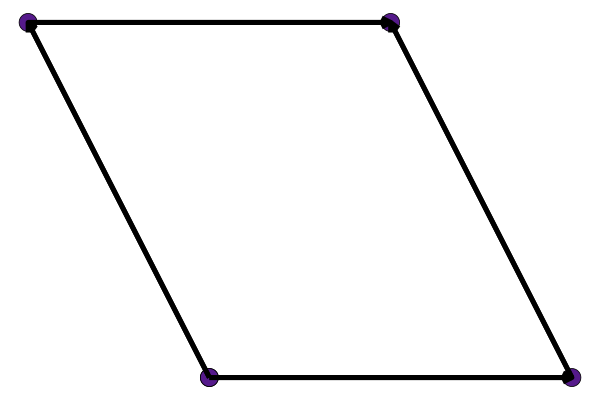

In [162]:
# DRAW CELL 
drawcell(cell)


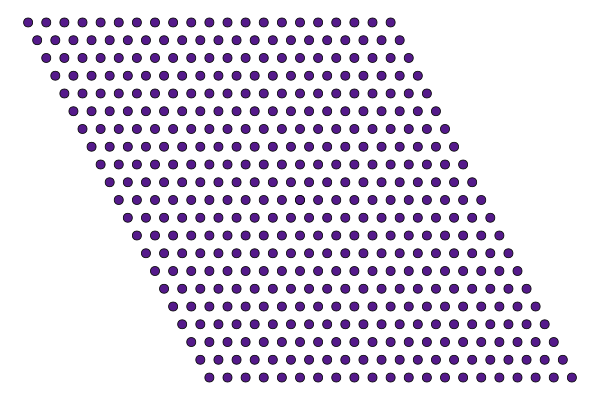

In [163]:
# DRAW LATTICE 
drawlattice(10, 10, cell)

# Next, we need to draw the crystal. We also need to somehow encode the the bond (link) data.

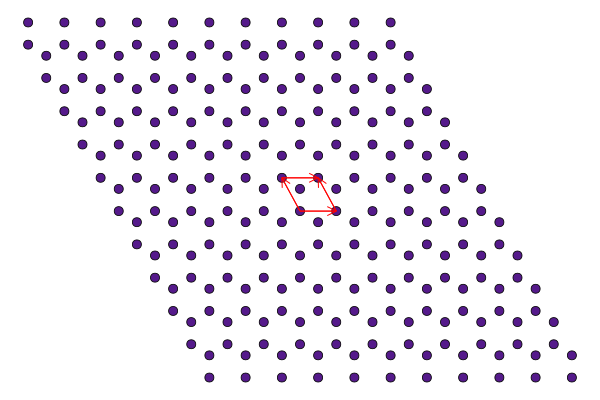

In [177]:
####################################################################################
####################### DRAWING 2D CRYSTAL #########################################
####################################################################################

function drawcrystal(boundx::Int, boundy::Int, uc::Cell)
    """
    Draws the crystal without nearest neighbor bonds
    """ 
    basis = uc.vielbein 
    cell_atom_pos = uc.orbitals_loci
    e1, e2 = basis[1, 1:2], basis[2, 1:2]
    
    supercell_atom_pos_array = Array{Float64}(undef, 1, 2) # Store atom positions 
    
    # Number of positions at which atomic orbitals are located 
    num_atom_loci = size(cell_atom_pos, 1)
    
    for atom_index in range(1, num_atom_loci, step = 1)
        for n in range(-boundx, boundx, step = 1)
            for m in range(-boundy, boundy, step = 1)
                position = reshape(cell_atom_pos[atom_index, 1:2] + n * e1 + m * e2, 1, 2) 
                supercell_atom_pos_array = vcat(supercell_atom_pos_array, position)
            end
        end
    end 
    x, y = supercell_atom_pos_array[:,1], supercell_atom_pos_array[:,2]
    
    # Draw Atoms in the supercell 
    scatter(x, y, 
        markersize = 5, 
        markercolor = :purple4, 
        xaxis = false, yaxis = false, legend = false, grid = false, ticks = false)

    # Draw Unit Cell 
    quiver!([0.0], [0.0], quiver = ([e1[1]], [e1[2]]), c = :red, linewidth = 1)
    quiver!([0.0], [0.0], quiver = ([e2[1]], [e2[2]]), c = :red, linewidth = 1)
    quiver!([e1[1]], [e1[2]], quiver = ([e2[1]], [e2[2]]), c = :red, linewidth = 1)
    quiver!([e2[1]], [e2[2]], quiver = ([e1[1]], [e1[2]]), c = :red, linewidth = 1)


end 
drawcrystal(5,5,cell)

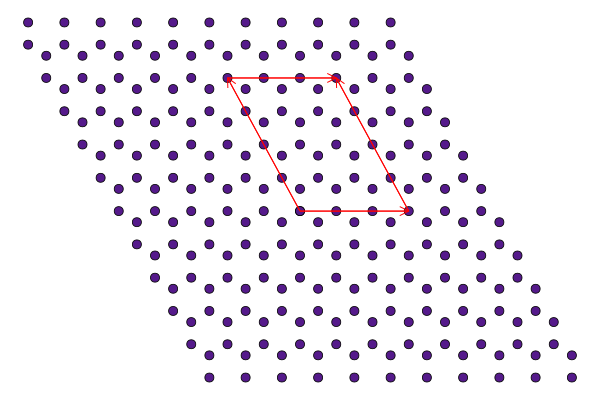

In [182]:
function drawcrystal(boundx::Int, boundy::Int, sc_param_1::Int, sc_param_2::Int, uc::Cell)
    """
    Draws the crystal without nearest neighbor bonds
    Draws a super unit cell with parameters m, n
    """ 
    basis = uc.vielbein 
    cell_atom_pos = uc.orbitals_loci
    e1, e2 = basis[1, 1:2], basis[2, 1:2]
    
    supercell_atom_pos_array = Array{Float64}(undef, 1, 2) # Store atom positions 
    
    # Number of positions at which atomic orbitals are located 
    num_atom_loci = size(cell_atom_pos, 1)
    
    for atom_index in range(1, num_atom_loci, step = 1)
        for n in range(-boundx, boundx, step = 1)
            for m in range(-boundy, boundy, step = 1)
                position = reshape(cell_atom_pos[atom_index, 1:2] + n * e1 + m * e2, 1, 2) 
                supercell_atom_pos_array = vcat(supercell_atom_pos_array, position)
            end
        end
    end 
    x, y = supercell_atom_pos_array[:,1], supercell_atom_pos_array[:,2]
    
    # Draw Atoms in the supercell 
    scatter(x, y, 
        markersize = 5, 
        markercolor = :purple4, 
        xaxis = false, yaxis = false, legend = false, grid = false, ticks = false)

    # Draw Unit Cell 
    quiver!([0.0], [0.0], quiver = ([sc_param_1 * e1[1]], [sc_param_1 * e1[2]]), c = :red, linewidth = 1)
    quiver!([0.0], [0.0], quiver = ([sc_param_2 * e2[1]], [sc_param_2 * e2[2]]), c = :red, linewidth = 1)
    quiver!([sc_param_1 * e1[1]], [sc_param_1 * e1[2]], quiver = ([sc_param_2 * e2[1]], [sc_param_2 * e2[2]]), c = :red, linewidth = 1)
    quiver!([sc_param_2 * e2[1]], [sc_param_2 * e2[2]], quiver = ([sc_param_1 * e1[1]], [sc_param_1 * e1[2]]), c = :red, linewidth = 1)


end 

drawcrystal(5,5, 3, 4, cell)

# Re-shaping the system. We want to perform cuts along co-dimension 1 sub-spaces 

First, we need to draw the boundaries of a regular two-dimensional polygon. We need a way to specify the parameters fixing the boundary lines. The best way to start is to specify the vertices of the polygon. I will use Julia's PolygonInbounds. The strategy is: 

1) Create a super-cell  
2) specify the vertices and edges of the polygon
3) Use the relevant PolygonInbounds' function to categorize the points into two disjoint sub-sets: A) inside or on boundary, and B) outside 


In [215]:
# Creating a function to compute the positions of the atomic orbitals inside the supercell. 
function supercell_orbitals_pos(boundx::Int, boundy::Int, uc::Cell)
    """
    Compute the positions of the atomic orbitals inside a given supercell
    """ 
    basis = uc.vielbein 
    cell_atom_pos = uc.orbitals_loci
    e1, e2 = basis[1, 1:2], basis[2, 1:2]
    
    supercell_atom_pos_array = Array{Float64}(undef, 0, 2) # Store atom positions 
    
    # Number of positions at which atomic orbitals are located 
    num_atom_loci = size(cell_atom_pos, 1)
    
    for atom_index in range(1, num_atom_loci, step = 1)
        for n in range(-boundx, boundx, step = 1)
            for m in range(-boundy, boundy, step = 1)
                position = reshape(cell_atom_pos[atom_index, 1:2] + n * e1 + m * e2, 1, 2) 
                supercell_atom_pos_array = vcat(supercell_atom_pos_array, position)
            end
        end
    end 
    return supercell_atom_pos_array 
end 



supercell_orbitals_pos (generic function with 1 method)

In [242]:
function regular_polygon_as_graph(
        vertices::Matrix{Float64}
        )
    """
    Create a regular polygon and represent it as a graph: set of edges and an incidence matrix 
    The incidence matrix is encoded as a matrix [a b ; c d ; ...] where the row a b means
    vertex a and the vertex b are connected by an edge 
    """
    num_pts = size(vertices, 1)
    
    # create a matrix representing incidence matrix as a 2 * num_pts matrix in the integers 
    incidence_mat = Array{Int64}(undef, 0, 2) 
    for i in range(1, num_pts, step = 1)
        if i < num_pts 
            row = [i i+1]
        elseif i == num_pts
            row = [i 1]
        end
        incidence_mat = vcat(incidence_mat, row)
        
    end
    return vertices, incidence_mat
    
end


regular_polygon_as_graph (generic function with 1 method)

In [243]:
# Solve the following classification problem: 
#    Given a set of points, determine whether they lie within or outside a given polygon. 

using PolygonInbounds
function points_inside_on_polygon(
        pts::Matrix{Float64},
        vertices::Matrix{Float64},
        edges::Matrix{Int64}
        )
    stat = inpoly2(pts, vertices, edges, atol = 1e-1) # Classifier 
    num_pts = size(pts, 1) # Number of points 
    nanodisk_atom_pos_array = Array{Float64}(undef, 0, 2) # Store atom positions
    # To get the points, we create a for loop with if statements 
    for i in range(1, num_pts, step = 1) # Go through all points 
        if stat[i, 1] == 1 | stat[i, 2] == 1 # Point in the polygon or on the boundary?
            row = reshape(pts[i,:], 1, 2)
            nanodisk_atom_pos_array = vcat(nanodisk_atom_pos_array, row)
        end
    end 
    return nanodisk_atom_pos_array
end



points_inside_on_polygon (generic function with 3 methods)

Let us test this with a pseudo-random triangle 

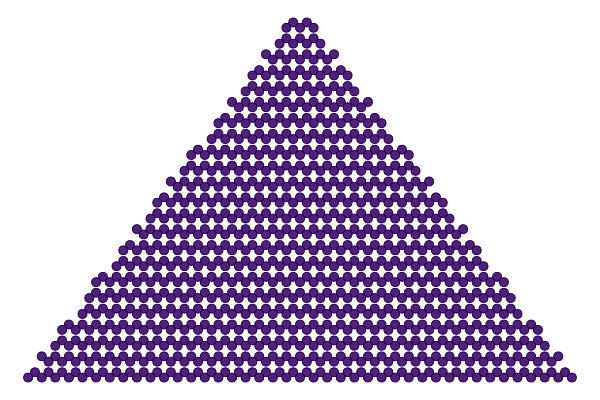

In [256]:
# Experimental function: drawnanodisk 

function drawnanodisk(
        uc::Cell, 
        vertices::Matrix{Float64}, 
        boundx = 100, 
        boundy = 100
        )
    """
    Given a unit cell and the vertices of a regular polygon, draw the positions of the orbitals
    """
    pts = supercell_orbitals_pos(boundx, boundy, uc) # all orbitals inside supercell 
    polygon = regular_polygon_as_graph(vertices) # boundary of the space 
    edges = polygon[2]
    nanodisk_pts = points_inside_on_polygon(pts, vertices, edges) # orbitals inside the nanodisk
    
    # Plotting 
    x, y = nanodisk_pts[:,1], nanodisk_pts[:,2]
    scatter(x, y, 
        markersize = 5, 
        markercolor = :purple4, 
        xaxis = false, yaxis = false, legend = false, grid = false, ticks = false)

    #sc_param_1, sc_param_2 = 1, 1 
    
    # Draw Unit Cell 
    #quiver!([0.0], [0.0], quiver = ([sc_param_1 * e1[1]], [sc_param_1 * e1[2]]), c = :red, linewidth = 1)
    #quiver!([0.0], [0.0], quiver = ([sc_param_2 * e2[1]], [sc_param_2 * e2[2]]), c = :red, linewidth = 1)
    #quiver!([sc_param_1 * e1[1]], [sc_param_1 * e1[2]], quiver = ([sc_param_2 * e2[1]], [sc_param_2 * e2[2]]), c = :red, linewidth = 1)
    #quiver!([sc_param_2 * e2[1]], [sc_param_2 * e2[2]], quiver = ([sc_param_1 * e1[1]], [sc_param_1 * e1[2]]), c = :red, linewidth = 1)


    
end 
        


vertices = [0.0 0.0 ; -50.0 -50.0 ; 50.0 -50.0]
drawnanodisk(cell, vertices)